In [1]:
import os
import glob
import torch
import argparse
import numpy as np
from functools import partial
from multiprocessing import Pool
from torch_geometric.data import Data
from PIL import Image
from torchvision import models, transforms


/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torch_geometric/typing.py:68: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /home/user/mambaforge/envs/env/lib/python3.11/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSsb
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /home/user/mambaforge/envs/env/lib/python3.11/site-packages/torch_cluster/_version_

In [2]:
# def extract_features(image_path):
#     # Load the pre-trained ResNet model
#     resnet = models.resnet50(pretrained=True)
    
#     # Remove the final classification layer
#     modules = list(resnet.children())[:-1]
#     resnet = torch.nn.Sequential(*modules)

#     # Set the model to evaluation mode
#     resnet.eval()

#     # Define the image transformation
#     preprocess = transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ])

#     # Load and preprocess the image
#     img = Image.open(image_path).convert('RGB')
#     img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension

#     # Extract features
#     with torch.no_grad():
#         features = resnet(img_tensor)

#     # Flatten the features to get a 1D feature vector
#     features_vector = features.view(features.size(0), -1)

#     return features_vector.numpy()  # Convert to numpy array if needed


In [3]:
# def get_edge_info(num_frame):
#     skip = skip_factor
#     node_source = []
#     node_target = []
#     edge_attr = []
#     for i in range(num_frame):
#         for j in range(num_frame):
#             frame_diff = i - j
#             if abs(frame_diff) <= tauf:
#                 node_source.append(i)
#                 node_target.append(j)
#                 edge_attr.append(np.sign(frame_diff))
#             elif skip:
#                 if (frame_diff % skip == 0) and (abs(frame_diff) <= skip * tauf):
#                     node_source.append(i)
#                     node_target.append(j)
#                     edge_attr.append(np.sign(frame_diff))
#     return node_source, node_target, edge_attr



In [4]:
# def generate_temporal_graph(image_folder, path_graphs, video_id):
#     image_files = sorted(glob.glob(os.path.join(image_folder, '*.png')))
#     num_frame = len(image_files)

#     features = []
#     for img_file in image_files:
#         img = Image.open(img_file).convert('RGB')
#         img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
#         features.append(img.flatten())  # Flatten the image into a feature vector

#     features = np.array(features)

#     # Get edge information
#     node_source, node_target, edge_attr = get_edge_info(num_frame)

#     # Create graph data object
#     graphs = Data(
#         x=torch.tensor(features, dtype=torch.float32),
#         edge_index=torch.tensor([node_source, node_target], dtype=torch.long),
#         edge_attr=torch.tensor(edge_attr, dtype=torch.float32),
#         g=video_id  # Global ID for the video
#     )

#     # Save graph data
#     torch.save(graphs, os.path.join(path_graphs, f'{video_id}.pt'))


In [5]:
# root_data = './data'
# tauf = 5
# skip_factor = 10
# i = 0

# dataset_folder = '/tmp/xirl/datasets/xmagical/train/shortstick'
# output_graphs_path = os.path.join(root_data, 'graphs')
# os.makedirs(output_graphs_path, exist_ok=True)

# # Iterate through each video folder (0/, 1/, etc.)
# for video_folder in os.listdir(dataset_folder):
#     i=i+1
#     print(i,'video:',video_folder)
#     full_video_path = os.path.join(dataset_folder, video_folder)
#     if os.path.isdir(full_video_path):
#         generate_temporal_graph(full_video_path, output_graphs_path, video_folder)

# print('Graph generation completed.')

1 video: 99


NameError: name 'generate_temporal_graph' is not defined

In [6]:
import os
import glob
import numpy as np
import torch
from torch_geometric.data import Data
from torchvision import models, transforms
from PIL import Image
from sklearn.neighbors import NearestNeighbors

def get_edge_info(num_frame):
    skip = skip_factor
    node_source = []
    node_target = []
    edge_attr = []
    for i in range(num_frame):
        for j in range(num_frame):
            frame_diff = i - j
            if abs(frame_diff) <= tauf:
                node_source.append(i)
                node_target.append(j)
                edge_attr.append(np.sign(frame_diff))
            elif skip:
                if (frame_diff % skip == 0) and (abs(frame_diff) <= skip * tauf):
                    node_source.append(i)
                    node_target.append(j)
                    edge_attr.append(np.sign(frame_diff))
    return node_source, node_target, edge_attr

def extract_features(image_path):
    resnet = models.resnet50(pretrained=True)
    modules = list(resnet.children())[:-1]
    resnet = torch.nn.Sequential(*modules)
    resnet.eval()

    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    img = Image.open(image_path).convert('RGB')
    img_tensor = preprocess(img).unsqueeze(0)

    with torch.no_grad():
        features = resnet(img_tensor)

    return features.view(features.size(0), -1).numpy()

def generate_temporal_graph(image_folder):
    image_files = sorted(glob.glob(os.path.join(image_folder, '*.png')))
    num_frame = len(image_files)

    features = []
    
    print(f"Extracting features from {num_frame} images in {image_folder}...")
    
    # Extract features for each image file
    for img_file in image_files:
        feature_vector = extract_features(img_file)
        features.append(feature_vector)

    features = np.array(features).squeeze()

    # Get edge information within the same video
    node_source, node_target, edge_attr = get_edge_info(num_frame)

    return features, node_source, node_target, edge_attr

def connect_videos_with_knn(all_graphs):
    all_features = []
    
    # Collect all features from all videos
    for features, _, _, _ in all_graphs:
        all_features.append(features)
    
    all_features = np.vstack(all_features)  # Combine features from all videos
    
    # Create a k-NN model to find nearest neighbors across videos
    knn_model = NearestNeighbors(n_neighbors=5)  # You can adjust n_neighbors as needed
    knn_model.fit(all_features)

    edges_from_other_videos = []

    # Create edges based on nearest neighbors
    start_index = 0  # To keep track of where each video's features start in the combined array

    print("Connecting images between videos using k-NN...")
    
    for video_index, (video_features, _, _, _) in enumerate(all_graphs):
        num_video_frames = video_features.shape[0]
        
        # Find nearest neighbors for each feature vector in the current video across all videos
        distances, indices = knn_model.kneighbors(video_features)

        for i in range(num_video_frames):
            for neighbor_index in indices[i]:
                # Ensure that we do not connect nodes within the same video
                if neighbor_index // num_video_frames != video_index:
                    edges_from_other_videos.append((start_index + i, neighbor_index))

        start_index += num_video_frames

        print(f"Processed video {video_index + 1}/{len(all_graphs)}: {num_video_frames} frames")

    return edges_from_other_videos

root_data = './data'
tauf = 5
skip_factor = 10

dataset_folder = '/tmp/xirl/datasets/xmagical/train/shortstick'
output_graphs_path = os.path.join(root_data, 'graphs')
os.makedirs(output_graphs_path, exist_ok=True)

all_graphs = []

# Iterate through each video folder (0/, 1/, etc.)
video_folders = os.listdir(dataset_folder)
total_videos = len(video_folders)

for video_index, video_folder in enumerate(video_folders):
    full_video_path = os.path.join(dataset_folder, video_folder)
    
    if os.path.isdir(full_video_path):
        features, node_source, node_target, edge_attr = generate_temporal_graph(full_video_path)
        
        # Store graph data as a tuple (features, source nodes, target nodes, edge attributes)
        all_graphs.append((features, node_source, node_target, edge_attr))
        
        print(f"Finished processing video {video_index + 1}/{total_videos}: {video_folder}")

# Connect images between videos using k-NN
edges_between_videos = connect_videos_with_knn(all_graphs)

# Combine all graphs into one large graph
combined_features = np.vstack([graph[0] for graph in all_graphs])  # Combine feature vectors
combined_node_source = []
combined_node_target = []
combined_edge_attr = []

# Add edges from individual videos to combined graph
for idx, (features, node_source, node_target, edge_attr) in enumerate(all_graphs):
    offset = sum([graph[0].shape[0] for graph in all_graphs[:idx]])  # Calculate offset for current video
    combined_node_source.extend([source + offset for source in node_source])
    combined_node_target.extend([target + offset for target in node_target])
    combined_edge_attr.extend(edge_attr)

# Add inter-video edges to combined graph
combined_node_source.extend([source for source, _ in edges_between_videos])
combined_node_target.extend([target for _, target in edges_between_videos])

# Create final graph data object with combined data
final_graph_data = Data(
    x=torch.tensor(combined_features, dtype=torch.float32),
    edge_index=torch.tensor([combined_node_source, combined_node_target], dtype=torch.long),
)

# Save the final combined graph data
torch.save(final_graph_data, os.path.join(output_graphs_path, 'combined_graph.pt'))

print('Combined graph generation completed and saved as combined_graph.pt.')

Extracting features from 80 images in /tmp/xirl/datasets/xmagical/train/shortstick/99...


/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Finished processing video 1/877: 99
Extracting features from 47 images in /tmp/xirl/datasets/xmagical/train/shortstick/448...
Finished processing video 2/877: 448
Extracting features from 119 images in /tmp/xirl/datasets/xmagical/train/shortstick/420...
Finished processing video 3/877: 420
Extracting features from 83 images in /tmp/xirl/datasets/xmagical/train/shortstick/868...
Finished processing video 4/877: 868
Extracting features from 49 images in /tmp/xirl/datasets/xmagical/train/shortstick/465...
Finished processing video 5/877: 465
Extracting features from 77 images in /tmp/xirl/datasets/xmagical/train/shortstick/136...
Finished processing video 6/877: 136
Extracting features from 76 images in /tmp/xirl/datasets/xmagical/train/shortstick/323...
Finished processing video 7/877: 323
Extracting features from 87 images in /tmp/xirl/datasets/xmagical/train/shortstick/683...
Finished processing video 8/877: 683
Extracting features from 81 images in /tmp/xirl/datasets/xmagical/train/sh

In [ ]:

# Connect images between videos using k-NN
edges_between_videos = connect_videos_with_knn(all_graphs)

# Combine all graphs into one large graph
combined_features = np.vstack([graph[0] for graph in all_graphs])  # Combine feature vectors
combined_node_source = []
combined_node_target = []
combined_edge_attr = []

# Add edges from individual videos to combined graph
for idx, (features, node_source, node_target, edge_attr) in enumerate(all_graphs):
    offset = sum([graph[0].shape[0] for graph in all_graphs[:idx]])  # Calculate offset for current video
    combined_node_source.extend([source + offset for source in node_source])
    combined_node_target.extend([target + offset for target in node_target])
    combined_edge_attr.extend(edge_attr)


# Add inter-video edges to combined graph
combined_node_source.extend([source for source, _ in edges_between_videos])
combined_node_target.extend([target for _, target in edges_between_videos])


In [ ]:

# Create final graph data object with combined data
final_graph_data = Data(
    x=torch.tensor(combined_features, dtype=torch.float32),
    edge_index=torch.tensor([combined_node_source, combined_node_target], dtype=torch.long),
)

# Save the final combined graph data
torch.save(final_graph_data, os.path.join(output_graphs_path, 'combined_graph.pt'))

print('Combined graph generation completed and saved as combined_graph.pt.')

Combined graph generation completed and saved as combined_graph.pt.


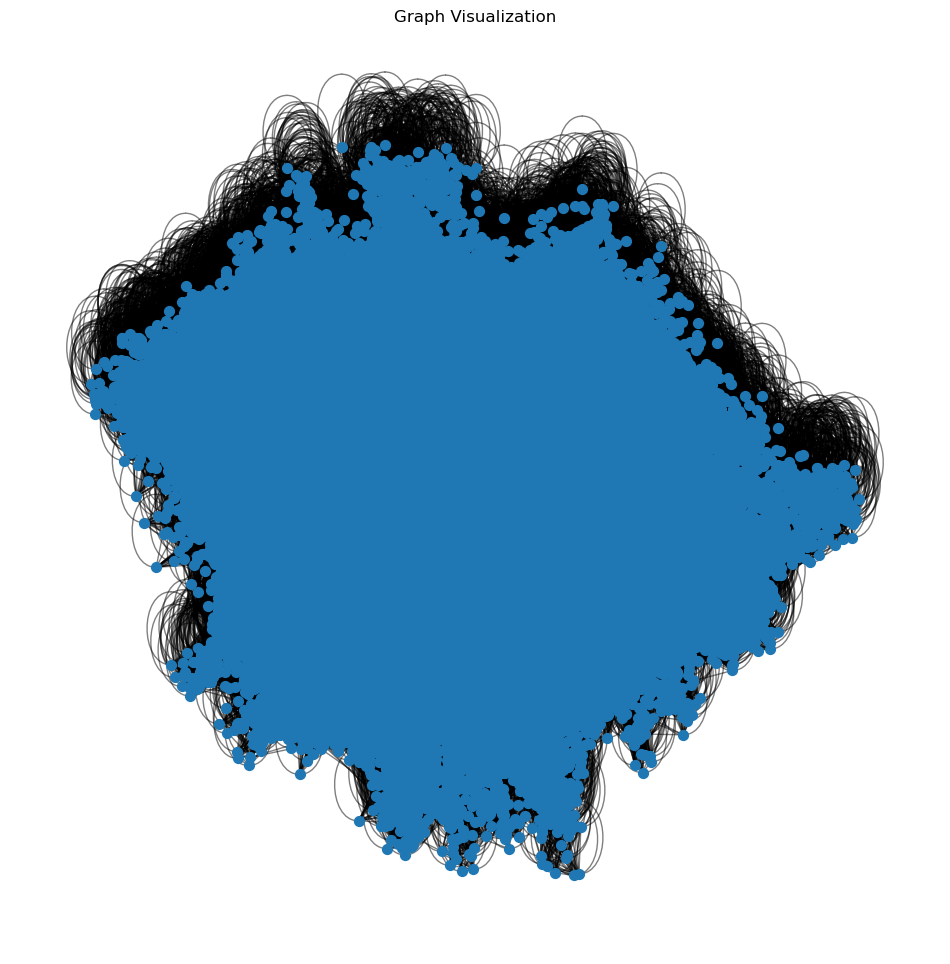

In [7]:
import os
import glob
import numpy as np
import torch
from torch_geometric.data import Data
from torchvision import models, transforms
from PIL import Image
from sklearn.neighbors import NearestNeighbors
import networkx as nx
import matplotlib.pyplot as plt

# (Include all previous functions here...)

def visualize_graph(graph_data):
    # Create a NetworkX graph from edge_index
    G = nx.Graph()

    # Add nodes with features as node attributes
    for i in range(graph_data.x.shape[0]):
        G.add_node(i, feature=graph_data.x[i].numpy())

    # Add edges from edge_index
    edge_index = graph_data.edge_index.numpy()
    for source, target in zip(edge_index[0], edge_index[1]):
        G.add_edge(source, target)

    # Draw the graph
    plt.figure(figsize=(12, 12))
    
    # Use a layout for better visibility
    pos = nx.spring_layout(G)  # positions for all nodes
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=50)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    
    plt.title("Graph Visualization")
    plt.axis('off')  # Turn off the axis
    plt.show()

# (Include all previous code for generating graphs...)

# After saving the final combined graph data:
# torch.save(final_graph_data, os.path.join(output_graphs_path, 'combined_graph.pt'))

# print('Combined graph generation completed and saved as combined_graph.pt.')

# Visualize the combined graph
# visualize_graph(final_graph_data)